In [10]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [63]:
# Import libraries
import time
import scipy.io
import numpy as np 
import pandas as pd 
import seaborn as sns
from scipy import stats
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


In [126]:
# Set path of the working directory
PATH = 'gdrive/My Drive/Colab Notebooks/fiverr-spammer-pred/' 

In [127]:
train = pd.read_csv(PATH+'train.csv')
test = pd.read_csv(PATH+'test.csv')

In [128]:
train.head()

,label,user_id,X1,X2,X3,X4,X5,X6,X7,X8,...,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51
0,0,1,20972,14,13,3,11,1,2,15,...,0,0,0,0,0,0,0,0,1,0
1,0,2,7362,213,71,3,11,1,2,15,...,0,0,0,0,0,0,0,0,0,0
2,0,3,21216,215,71,3,11,1,2,15,...,0,0,0,0,0,0,0,0,0,0
3,0,4,2261,212,71,2,8,1,2,15,...,0,0,0,0,0,0,0,1,0,0
4,0,5,4543,213,71,2,8,1,2,15,...,0,0,0,0,0,0,0,0,0,0


In [129]:
test.head()

,user_id,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51
0,57,19364,213,51,2,8,1,2,15,26,...,0,0,0,0,0,0,0,0,0,0
1,58,16000,212,13,3,11,1,2,15,26,...,0,0,0,0,0,0,0,0,0,0
2,59,14482,78,51,2,8,1,2,15,26,...,0,0,0,0,0,0,0,1,0,0
3,60,18074,175,51,2,8,1,2,15,26,...,0,1,0,0,0,0,0,1,0,0
4,61,4807,213,71,3,11,1,2,15,18,...,0,0,0,0,0,0,0,1,0,0


In [130]:
train.describe()

,label,user_id,X1,X2,X3,X4,X5,X6,X7,X8,...,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51
count,458798.000000,458798.000000,458798.000000,458798.000000,458798.000000,458798.000000,458798.000000,458798.000000,458798.000000,458798.000000,...,458798.000000,458798.000000,458798.000000,458798.000000,458798.0,458798.0,458798.0,458798.000000,458798.000000,458798.000000
mean,0.026855,241363.771411,10850.591243,154.947696,28.107965,2.407831,10.985176,3.215446,5.082675,15.654039,...,0.519900,0.041033,0.074793,0.008123,0.0,0.0,0.0,0.299703,0.512291,0.000072
std,0.161660,139440.017203,7078.656632,67.952267,19.227303,0.800163,5.527487,0.811902,3.302548,4.993260,...,1.557607,0.253398,0.432161,0.089763,0.0,0.0,0.0,0.458128,0.499849,0.008481
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,0.000000,120595.250000,4692.000000,95.000000,13.000000,2.000000,8.000000,3.000000,2.000000,14.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
50%,0.000000,241234.500000,11574.000000,189.000000,14.000000,3.000000,11.000000,3.000000,5.000000,15.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.000000
75%,0.000000,362157.750000,16425.000000,213.000000,37.000000,3.000000,16.000000,4.000000,8.000000,21.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000,1.000000,0.000000
max,1.000000,482935.000000,24234.000000,222.000000,94.000000,3.000000,17.000000,4.000000,11.000000,29.000000,...,97.000000,33.000000,56.000000,1.000000,0.0,0.0,0.0,1.000000,1.000000,1.000000


In [131]:
test.describe()

,user_id,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51
count,24148.000000,24148.000000,24148.000000,24148.000000,24148.000000,24148.000000,24148.000000,24148.000000,24148.000000,24148.000000,...,24148.000000,24148.000000,24148.000000,24148.000000,24148.0,24148.0,24148.0,24148.000000,24148.000000,24148.000000
mean,243558.279568,10634.594998,157.861769,27.778035,2.378831,10.609947,3.223124,5.031762,15.769008,17.677323,...,0.524888,0.044310,0.075079,0.003975,0.0,0.0,0.0,0.296215,0.497929,0.000166
std,138918.136721,7053.475591,67.294312,18.021320,0.809837,5.433519,0.815426,3.360214,4.928434,6.325484,...,1.538426,0.274131,0.395071,0.062927,0.0,0.0,0.0,0.456596,0.500006,0.012870
min,57.000000,1.000000,1.000000,4.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,123374.750000,4543.000000,95.000000,13.000000,2.000000,8.000000,3.000000,2.000000,14.000000,14.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
50%,246226.500000,11350.000000,205.000000,14.000000,3.000000,11.000000,3.000000,5.000000,15.000000,14.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
75%,363157.250000,16244.000000,213.000000,37.000000,3.000000,16.000000,4.000000,8.000000,21.000000,24.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000,1.000000,0.000000
max,482946.000000,24231.000000,222.000000,94.000000,3.000000,17.000000,4.000000,11.000000,29.000000,38.000000,...,38.000000,16.000000,16.000000,1.000000,0.0,0.0,0.0,1.000000,1.000000,1.000000


In [132]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458798 entries, 0 to 458797
Data columns (total 53 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   label    458798 non-null  int64  
 1   user_id  458798 non-null  int64  
 2   X1       458798 non-null  int64  
 3   X2       458798 non-null  int64  
 4   X3       458798 non-null  int64  
 5   X4       458798 non-null  int64  
 6   X5       458798 non-null  int64  
 7   X6       458798 non-null  int64  
 8   X7       458798 non-null  int64  
 9   X8       458798 non-null  int64  
 10  X9       458798 non-null  int64  
 11  X10      458798 non-null  int64  
 12  X11      458798 non-null  int64  
 13  X12      458798 non-null  int64  
 14  X13      458792 non-null  float64
 15  X14      458798 non-null  int64  
 16  X15      458798 non-null  int64  
 17  X16      458798 non-null  int64  
 18  X17      458798 non-null  int64  
 19  X18      458798 non-null  int64  
 20  X19      458798 non-null  

In [133]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24148 entries, 0 to 24147
Data columns (total 52 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   user_id  24148 non-null  int64
 1   X1       24148 non-null  int64
 2   X2       24148 non-null  int64
 3   X3       24148 non-null  int64
 4   X4       24148 non-null  int64
 5   X5       24148 non-null  int64
 6   X6       24148 non-null  int64
 7   X7       24148 non-null  int64
 8   X8       24148 non-null  int64
 9   X9       24148 non-null  int64
 10  X10      24148 non-null  int64
 11  X11      24148 non-null  int64
 12  X12      24148 non-null  int64
 13  X13      24148 non-null  int64
 14  X14      24148 non-null  int64
 15  X15      24148 non-null  int64
 16  X16      24148 non-null  int64
 17  X17      24148 non-null  int64
 18  X18      24148 non-null  int64
 19  X19      24148 non-null  int64
 20  X20      24148 non-null  int64
 21  X21      24148 non-null  int64
 22  X22      24148 non-nul

In [134]:
# find missing values in the dataset
train.columns[train.isnull().any()]

Index(['X13'], dtype='object')

In [135]:
train['X13'].isnull().sum()

6

In [136]:
test.columns[test.isnull().any()]

Index([], dtype='object')

In [137]:
train.nunique()

label           2
user_id    458798
X1          23696
X2            222
X3             94
X4              3
X5             17
X6              4
X7             11
X8             29
X9             38
X10         47380
X11             2
X12             2
X13            10
X14             6
X15            13
X16            35
X17            27
X18            25
X19           200
X20             2
X21           511
X22            54
X23            16
X24            30
X25            84
X26            41
X27             1
X28            29
X29             1
X30             1
X31            36
X32            71
X33             1
X34            12
X35            11
X36             9
X37             6
X38            23
X39            29
X40             7
X41            25
X42            51
X43            16
X44            29
X45             2
X46             1
X47             1
X48             1
X49             2
X50             2
X51             2
dtype: int64

In [138]:
features_to_drop = train.columns[train.nunique() < 10]

In [139]:
features_to_drop = list(features_to_drop) 
features_to_drop.remove('label')
features_to_drop.append('X13')
features_to_drop.append('user_id')

In [140]:
features_to_drop

['X4',
 'X6',
 'X11',
 'X12',
 'X14',
 'X20',
 'X27',
 'X29',
 'X30',
 'X33',
 'X36',
 'X37',
 'X40',
 'X45',
 'X46',
 'X47',
 'X48',
 'X49',
 'X50',
 'X51',
 'X13',
 'user_id']

In [141]:
train_cleaned = train.drop(features_to_drop, axis=1)
train_cleaned.shape

(458798, 31)

In [142]:
test_cleaned = test.drop(features_to_drop, axis=1)
test_cleaned.shape

(24148, 30)

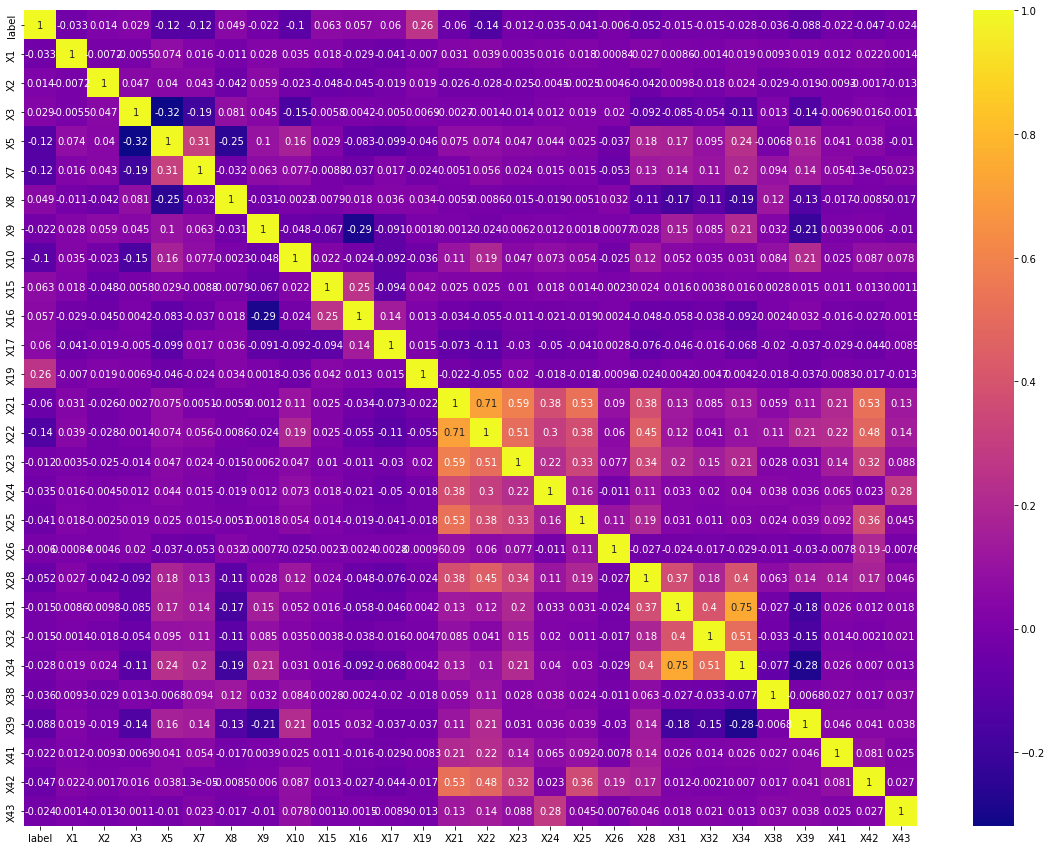

In [524]:
# correlation matrix
corr_matrix = train_cleaned.corr()

# correlation matrix heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot = True, cmap="plasma")
plt.show()

In [523]:
upper_corr = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
highly_corr_features = [column for column in upper_corr.columns if any(upper_corr[column] > 0.8)]
print(); print(highly_corr_features)


[]


In [145]:
train_cleaned = train_cleaned.drop(highly_corr_features, axis=1)
train_cleaned.shape

(458798, 28)

In [146]:
test_cleaned = test_cleaned.drop(highly_corr_features, axis=1)
test_cleaned.shape

(24148, 27)

In [147]:
train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458798 entries, 0 to 458797
Data columns (total 28 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   label   458798 non-null  int64
 1   X1      458798 non-null  int64
 2   X2      458798 non-null  int64
 3   X3      458798 non-null  int64
 4   X5      458798 non-null  int64
 5   X7      458798 non-null  int64
 6   X8      458798 non-null  int64
 7   X9      458798 non-null  int64
 8   X10     458798 non-null  int64
 9   X15     458798 non-null  int64
 10  X16     458798 non-null  int64
 11  X17     458798 non-null  int64
 12  X19     458798 non-null  int64
 13  X21     458798 non-null  int64
 14  X22     458798 non-null  int64
 15  X23     458798 non-null  int64
 16  X24     458798 non-null  int64
 17  X25     458798 non-null  int64
 18  X26     458798 non-null  int64
 19  X28     458798 non-null  int64
 20  X31     458798 non-null  int64
 21  X32     458798 non-null  int64
 22  X34     458798 non-n

In [148]:
test_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24148 entries, 0 to 24147
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      24148 non-null  int64
 1   X2      24148 non-null  int64
 2   X3      24148 non-null  int64
 3   X5      24148 non-null  int64
 4   X7      24148 non-null  int64
 5   X8      24148 non-null  int64
 6   X9      24148 non-null  int64
 7   X10     24148 non-null  int64
 8   X15     24148 non-null  int64
 9   X16     24148 non-null  int64
 10  X17     24148 non-null  int64
 11  X19     24148 non-null  int64
 12  X21     24148 non-null  int64
 13  X22     24148 non-null  int64
 14  X23     24148 non-null  int64
 15  X24     24148 non-null  int64
 16  X25     24148 non-null  int64
 17  X26     24148 non-null  int64
 18  X28     24148 non-null  int64
 19  X31     24148 non-null  int64
 20  X32     24148 non-null  int64
 21  X34     24148 non-null  int64
 22  X38     24148 non-null  int64
 23  X39     241

In [149]:
train_cleaned.isnull().sum()

label    0
X1       0
X2       0
X3       0
X5       0
X7       0
X8       0
X9       0
X10      0
X15      0
X16      0
X17      0
X19      0
X21      0
X22      0
X23      0
X24      0
X25      0
X26      0
X28      0
X31      0
X32      0
X34      0
X38      0
X39      0
X41      0
X42      0
X43      0
dtype: int64

In [150]:
test_cleaned.isnull().sum()

X1     0
X2     0
X3     0
X5     0
X7     0
X8     0
X9     0
X10    0
X15    0
X16    0
X17    0
X19    0
X21    0
X22    0
X23    0
X24    0
X25    0
X26    0
X28    0
X31    0
X32    0
X34    0
X38    0
X39    0
X41    0
X42    0
X43    0
dtype: int64

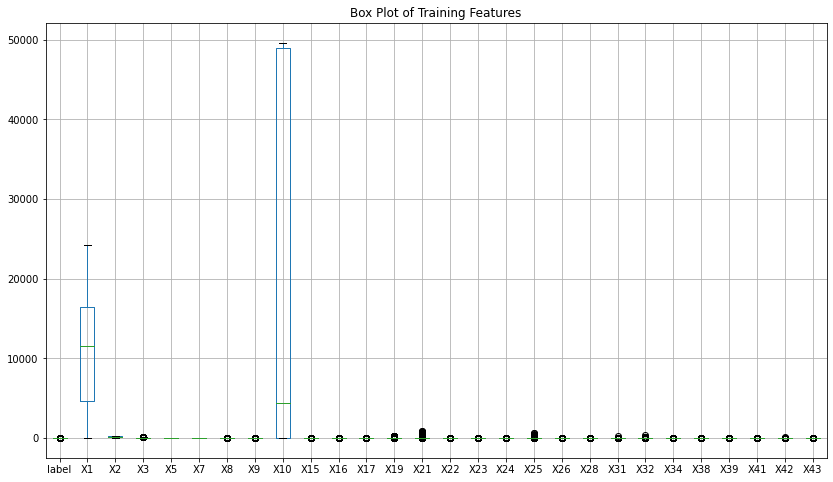

In [152]:
plt.figure(figsize=(14, 8))
plt.title('Box Plot of Training Features')
train_cleaned.boxplot()

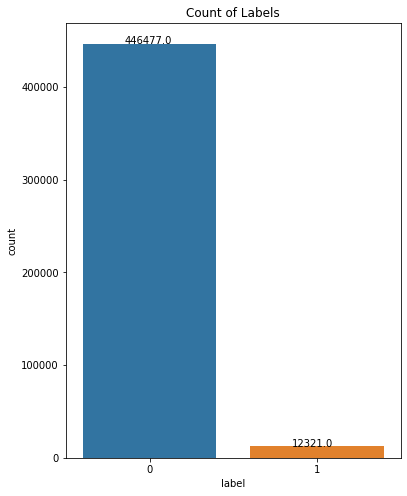

In [322]:
# Count plot of target variable
plt.figure(figsize=(6,8))
ax = sns.countplot(data=train_cleaned, x='label')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title('Count of Labels')
plt.show()

In [217]:
spammers_df = train_cleaned.loc[train_cleaned['label'] == 0]
spammers = spammers_df.iloc[:12321]

In [218]:
non_spammers = train_cleaned.loc[train_cleaned['label'] == 1]
non_spammers

,label,X1,X2,X3,X5,X7,X8,X9,X10,X15,...,X26,X28,X31,X32,X34,X38,X39,X41,X42,X43
2737,1,1608,78,36,9,1,21,26,49593,0,...,0,0,0,0,0,0,0,0,0,0
3589,1,5490,213,36,9,1,21,18,1,0,...,0,0,0,0,0,0,0,0,0,0
3640,1,103,79,36,9,1,21,14,1,0,...,0,0,0,0,0,0,0,0,0,0
3918,1,9552,213,36,9,1,7,26,1,0,...,0,0,0,0,0,0,0,0,0,0
4012,1,4543,213,36,9,1,21,26,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458469,1,12509,213,13,17,4,22,28,1,2,...,0,1,1,1,1,0,0,0,0,0
458545,1,24039,51,13,16,4,22,14,7464,1,...,0,0,2,1,1,0,0,0,0,0
458767,1,9552,213,13,16,4,22,36,1,0,...,0,1,1,1,1,0,0,0,0,0
458780,1,8821,219,33,16,4,3,26,48955,0,...,0,1,2,1,1,0,0,0,0,0


In [227]:
train_balanced = pd.concat([spammers, non_spammers])

In [229]:
train_balanced.describe()

,label,X1,X2,X3,X5,X7,X8,X9,X10,X15,...,X26,X28,X31,X32,X34,X38,X39,X41,X42,X43
count,24642.00000,24642.000000,24642.000000,24642.000000,24642.000000,24642.000000,24642.000000,24642.000000,24642.000000,24642.000000,...,24642.000000,24642.000000,24642.000000,24642.000000,24642.000000,24642.000000,24642.000000,24642.000000,24642.000000,24642.000000
mean,0.50000,10226.847171,163.977762,35.586194,8.029908,1.957674,17.823391,20.077835,7359.040175,0.214836,...,0.052958,0.136393,0.198645,0.201932,0.147269,0.009821,0.049509,0.012742,0.278305,0.008644
std,0.50001,7009.552303,61.792309,12.708677,4.508662,1.883060,5.134028,6.236810,16946.511645,0.574072,...,0.675326,0.471869,0.644665,0.914359,0.403737,0.112457,0.286288,0.185729,1.641941,0.110919
min,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,4457.250000,142.000000,36.000000,2.000000,1.000000,15.000000,14.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.50000,11574.000000,211.000000,36.000000,9.000000,1.000000,21.000000,18.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.00000,15197.750000,213.000000,37.000000,9.000000,2.000000,21.000000,26.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.00000,24231.000000,222.000000,94.000000,17.000000,11.000000,29.000000,38.000000,49636.000000,8.000000,...,34.000000,14.000000,20.000000,52.000000,7.000000,4.000000,8.000000,8.000000,57.000000,6.000000


In [489]:
#normalized_features = (train_balanced - train_balanced.mean())/train_balanced.std()

normalized_features = (train_cleaned - train_cleaned.mean())/train_cleaned.std()
normalized_features = normalized_features.drop('label', axis=1)

In [498]:
X = normalized_features
y = train_cleaned['label']

In [499]:
X.shape, y.shape

((458798, 27), (458798,))

In [500]:
# X_train = pd.concat([X.iloc[:8624], X.iloc[16017:]])
# y_train = pd.concat([y.iloc[:8624], y.iloc[16017:]])

In [501]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = True)

In [502]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321158 entries, 301270 to 79218
Data columns (total 27 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      321158 non-null  float64
 1   X2      321158 non-null  float64
 2   X3      321158 non-null  float64
 3   X5      321158 non-null  float64
 4   X7      321158 non-null  float64
 5   X8      321158 non-null  float64
 6   X9      321158 non-null  float64
 7   X10     321158 non-null  float64
 8   X15     321158 non-null  float64
 9   X16     321158 non-null  float64
 10  X17     321158 non-null  float64
 11  X19     321158 non-null  float64
 12  X21     321158 non-null  float64
 13  X22     321158 non-null  float64
 14  X23     321158 non-null  float64
 15  X24     321158 non-null  float64
 16  X25     321158 non-null  float64
 17  X26     321158 non-null  float64
 18  X28     321158 non-null  float64
 19  X31     321158 non-null  float64
 20  X32     321158 non-null  float64
 21  X34   

In [503]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

In [504]:
print(X_train)
print(y_train)

[[ 1.85605962  0.85431005  0.41045982 ... -0.16680269  1.59225009
  -0.16193252]
 [-0.54481965 -0.04337892 -0.7857558  ... -0.16680269 -0.33378109
  -0.16193252]
 [ 0.46398758 -0.33770317 -0.7857558  ... -0.16680269  0.3082293
  -0.16193252]
 ...
 [ 0.5703637   0.85431005  0.41045982 ... -0.16680269 -0.33378109
  -0.16193252]
 [-1.53271896  0.83959383  1.19060044 ... -0.16680269  0.3082293
  -0.16193252]
 [ 1.84391042 -1.70631094  0.41045982 ... -0.16680269 -0.33378109
  -0.16193252]]
[0 0 0 ... 0 0 0]


In [505]:
X_train.shape, y_train.shape

((321158, 27), (321158,))

In [506]:
X_test.shape, y_test.shape

((137640, 27), (137640,))

In [507]:
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Dropout 
from sklearn.metrics import roc_curve, auc


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score


In [521]:
# fit the model
model = Sequential()
model.add(Dense(27, input_dim=X_train.shape[1], activation='relu', kernel_initializer='normal'))
model.add(Dense(18, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(18,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(12,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=50, 
                 epochs=50, validation_data = (X_test, y_test), verbose=1)

Epoch 1/50
6424/6424 [==============================] - 20s 3ms/step - loss: 0.0757 - accuracy: 0.9802 - val_loss: 0.0702 - val_accuracy: 0.9811
Epoch 2/50
6424/6424 [==============================] - 19s 3ms/step - loss: 0.0652 - accuracy: 0.9813 - val_loss: 0.0664 - val_accuracy: 0.9811
Epoch 3/50
6424/6424 [==============================] - 17s 3ms/step - loss: 0.0638 - accuracy: 0.9817 - val_loss: 0.0633 - val_accuracy: 0.9818
Epoch 4/50
6424/6424 [==============================] - 17s 3ms/step - loss: 0.0633 - accuracy: 0.9820 - val_loss: 0.0628 - val_accuracy: 0.9825
Epoch 5/50
6424/6424 [==============================] - 21s 3ms/step - loss: 0.0623 - accuracy: 0.9822 - val_loss: 0.0626 - val_accuracy: 0.9824
Epoch 6/50
6424/6424 [==============================] - 17s 3ms/step - loss: 0.0617 - accuracy: 0.9823 - val_loss: 0.0628 - val_accuracy: 0.9822
Epoch 7/50
6424/6424 [==============================] - 17s 3ms/step - loss: 0.0610 - accuracy: 0.9825 - val_loss: 0.0616 - val_ac

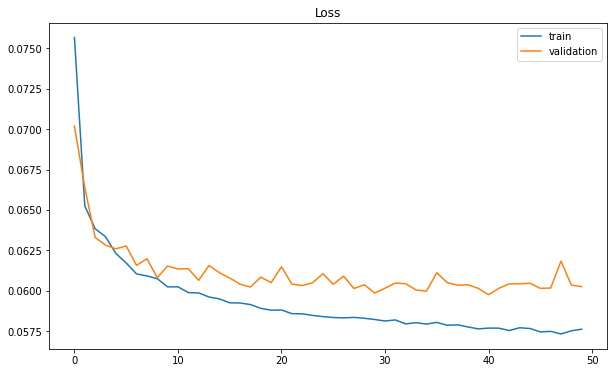

In [525]:
# plot loss during training
plt.figure(figsize=(10,6))
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()

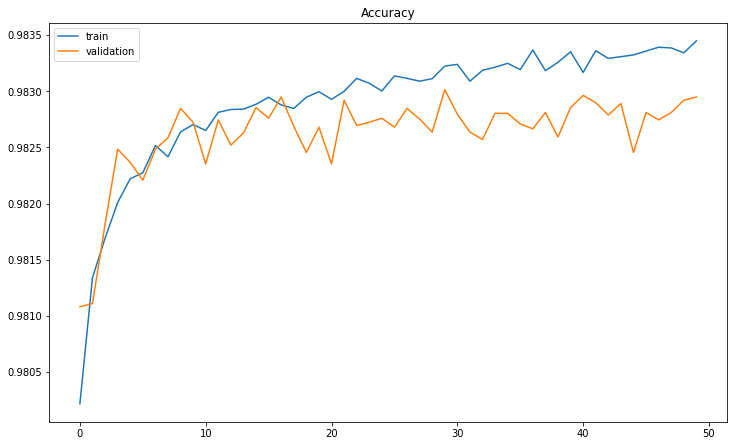

In [526]:
# plot accuracy during training
plt.subplots(figsize=(10,6))
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.tight_layout(0)
plt.legend()
plt.show()

In [511]:
test_normalized = (test_cleaned - test_cleaned.mean())/test_cleaned.std()
test_normalized

,X1,X2,X3,X5,X7,X8,X9,X10,X15,X16,...,X26,X28,X31,X32,X34,X38,X39,X41,X42,X43
0,1.237603,0.819359,1.288583,-0.480342,-0.902253,-0.156035,1.315738,1.308745,-0.363618,-0.467195,...,-0.052762,-0.598986,-0.547493,-0.462530,-0.638689,-0.253476,-0.670354,-0.179266,-0.341185,-0.161639
1,0.760675,0.804499,-0.820031,0.071786,-0.902253,-0.156035,1.315738,1.308745,-0.363618,-0.467195,...,-0.052762,1.929962,-0.547493,-0.462530,-0.638689,-0.253476,-0.670354,-0.179266,-0.341185,-0.161639
2,0.545462,-1.186754,1.288583,-0.480342,-0.902253,-0.156035,1.315738,1.310818,-0.363618,-1.231736,...,-0.052762,-0.598986,-0.547493,-0.462530,-0.638689,-0.253476,-0.670354,-0.179266,-0.341185,-0.161639
3,1.054715,0.254676,1.288583,-0.480342,-0.902253,-0.156035,1.315738,1.308745,-0.363618,-0.467195,...,-0.052762,-0.598986,-0.547493,-0.462530,-0.638689,-0.253476,-0.670354,-0.179266,-0.341185,3.486258
4,-0.826202,0.819359,2.398380,0.071786,-0.902253,-0.156035,0.051012,1.308745,-0.363618,-0.212348,...,-0.052762,-0.598986,-0.547493,-0.462530,-0.638689,-0.253476,-0.670354,-0.179266,-0.341185,-0.161639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24143,-0.294266,-0.087106,1.677012,0.992000,-0.307053,-2.185077,1.631919,0.167121,-0.363618,-0.212348,...,-0.052762,-0.598986,0.613862,4.776294,0.941057,-0.253476,-0.670354,-0.179266,-0.341185,-0.161639
24144,-0.355937,0.819359,0.012317,0.992000,-0.307053,1.264295,2.896644,1.321052,-0.363618,2.081275,...,-0.052762,-0.598986,0.613862,2.156882,0.941057,-0.253476,-0.670354,-0.179266,-0.341185,-0.161639
24145,0.280770,-0.934132,-0.764541,-1.584599,-0.307053,1.264295,-0.581350,1.014064,-0.363618,0.042499,...,-0.052762,0.665488,0.613862,3.030019,0.941057,-0.253476,0.787999,-0.179266,-0.341185,-0.161639
24146,-0.273141,-1.677137,-0.820031,0.992000,-0.307053,-2.590886,-2.636529,-0.584492,-0.363618,0.042499,...,-0.052762,3.194437,0.613862,0.410607,0.941057,-0.253476,-0.670354,13.247874,-0.341185,-0.161639


In [512]:
submission_test = test_normalized.to_numpy()
submission_test.shape

(24148, 27)

In [513]:
y_pred_NN = model.predict(submission_test)

In [514]:
predictions = (y_pred_NN > 0.5).astype(int).reshape(submission_test.shape[0])

Text(0.5, 0, 'False Positive Rate')

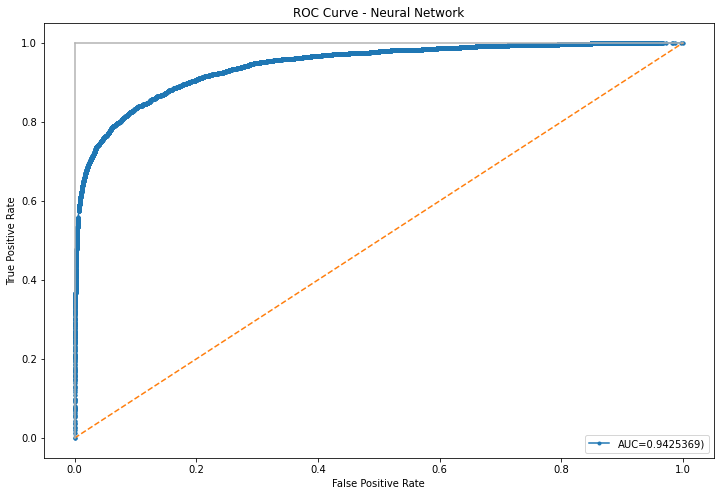

In [527]:
y_pred = model.predict(X_test).ravel()
plt.figure(figsize=(12,8))
plt.title('ROC Curve - Neural Network')
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='AUC=%0.7f)' % auc_keras)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.legend(loc=4)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [516]:
# now, reading the submission file to store the predictions in it
submission = pd.read_csv(PATH + 'sample_submission.csv')
submission.head()

,user_id,label
0,57,0
1,58,0
2,59,0
3,60,0
4,61,0


In [517]:
submission.label = predictions
submission.columns = ['user_id', 'prediction']

In [518]:
submission.to_csv(PATH+'submission.csv', index = False)

In [520]:
x = 0
for i in predictions:
  if i == 1:
    x += 1

print(x)

683
